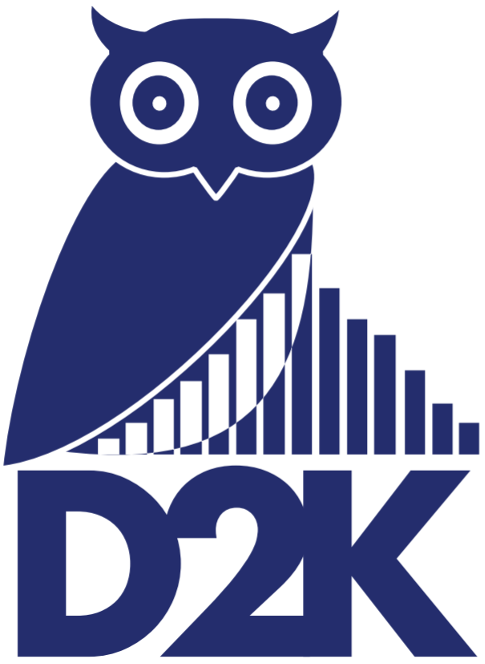 

<center>

# Welcome to COMP 680 #
### Statistics for Computing and Data Science ###

### Homework 6 ###

In [ ]:
### standard imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  
plt.style.use('fivethirtyeight')
plt.rcParams["patch.force_edgecolor"] = True
import seaborn as sns

import statsmodels.api as sm
from statsmodels.sandbox.predict_functional import predict_functional
import scipy.stats as st

import warnings
warnings.filterwarnings("ignore")

## NHANES Case Study

In this homework, we will be working with the [NHANES](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2015) data again. We will perform the same processing and cleaning of the data as before:

In [ ]:
nhanes = pd.read_csv("nhanes_2015_2016.csv")
# fix column names to be informative
new_col_names = {'SEQN':'ID',
                 'ALQ130':'Avg_drinks_per_day', 'SMQ020': 'Smoker', 
                 'RIAGENDR':'Gender', 'RIDAGEYR':'Age', 'RIDRETH1':'Race', 
                 'DMDCITZN':'Citizenship', 'DMDEDUC2':'Education_Level', 
                 'DMDMARTL':'Marital_Status', 'INDFMPIR':'Family_PIR', 
                 'BPXSY1':'Systolic_Blood_Pressure', 'BPXDI1':'Diastolic_Blood_Pressure', 
                 'BMXWT':'Weight', 'BMXHT':'Height', 'BMXBMI':'BMI', 
                 'BMXLEG':'Leg_Length', 'BMXARML':'Arm_Length', 
                 'BMXARMC': 'Arm_Circumference', 'BMXWAIST':'Waist_Circumference'}
nhanes.rename(columns=new_col_names, inplace=True)
# replace some code as missing values
nhanes['ALQ101'] =  nhanes['ALQ101'].replace({7:np.NaN, 9:np.NaN})
nhanes['ALQ110'] =  nhanes['ALQ110'].replace({7:np.NaN, 9:np.NaN})
nhanes['Avg_drinks_per_day'] =  nhanes['Avg_drinks_per_day'].replace({777:np.NaN, 999:np.NaN})
nhanes['Smoker'] = nhanes['Smoker'].replace({7:np.NaN, 9:np.NaN})
nhanes['Education_Level'] = nhanes['Education_Level'].replace({7:np.NaN, 9:np.NaN})
nhanes['Marital_Status'] = nhanes['Marital_Status'].replace({77:np.NaN})
nhanes['Citizenship'] = nhanes['Citizenship'].replace({7:np.NaN, 9:np.NaN})
# there are quite a few missing values but most model will exclude them
nhanes.head()

**Question 1:** 
We generate a binary variable reflecting whether a person has smoked at least 100 cigarettes in life, based on the original [SMQ020](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/SMQ_I.htm#SMQ020) variable in NHANES, renamed above to be `Smoker`.

In [ ]:
# recode Smoker so 1 is smoker and 0 is non-smoker
nhanes['Smoker'] = nhanes['Smoker'].replace({2:0})
nhanes.head()

 **1.1:** Fit a logistic regression model [sm.GLM.from_formula](https://www.statsmodels.org/dev/examples/notebooks/generated/glm_formula.html) using only one covariate Gender to predict smoking status. Reminder the variable `Gender` is coded as following, but you should include in the model correctly as a categorical variable, and use the Male category as reference!
 - Gender:
    - 1: Male
    - 2: Female

In [ ]:
# enter your code here
...

**1.2:** Calculate the probability, odds, and log odds of the variable `Smoker` for females and for males, **without using the model in 1.1** What is the log odds of smoking for males?  Then calculate the log odds ratio for females relative to males, that is the log odds ratio of females minus the log odds ratio of males.

**Hint:** You may find [`df.pivot_table`](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) useful.

In [ ]:
# enter your code here
...

In [ ]:
# Log odds ratio for males:
lodds_male = ...
# Log odds ratio for females:
lodds_female = ...
# Log odds ratio for females relative to males:
lodds_female_to_male = ...

In [ ]:
# print out result
print('Smoking log odds ratio for male: %.4f' % lodds_male)
print('Smoking log odds ratio for female: %.4f' % lodds_female)
print('Smoking log odds ratio for female relative to male: %.4f' % lodds_female_to_male)

**1.3:** If your calculation in **1.2** is correct, you should end up with almost identical numbers as the coefficients in model in **1.1** (assuming you fit the model correctly). What are the interpretations for the intercept and slope for the model in **1.1**? I hope the above exercise helps with the interpretations!

**Solution:**  

Interpretation for intercept: 

Interpretation for slope: 


**1.4:** Based on the model results in **1.1**, can we conclude that more than 50% of male are smokers in general population?

**Solution:**: 


**1.5:** Does there appear to be a significant difference between the smoking status of female and male? If so, can you quantify the difference based on the model in **1.1**: how much more likely that male are smokers than female?

In [ ]:
# calculate odds ratio of male over female
# notice the model coefficient is female over male, so need to do 1 / 
...

**Solution:**: 


**Question 2:** We will build upon the model in **Question 1** by adding more covariates from the data.

**2.1:** Let's first add age to the model, so fit a logistic regression model using Gender and Age to predict smoking status.

In [4]:
# enter your code here
...

**2.2:** Based on the model result in **2.1**, how do we interpret all the coefficients?

**Solution:**  

Interpretation for intercept: 

Interpretation for slope of female: 

Interpretation for slope of age: 

**2.3:** Let's now add an interaction term of age and gender to the model!

In [5]:
# enter your code here
...

**2.4:** Based on the model result in **2.3**, how do we interpret all the coefficients? What does it imply if the interaction term is significant?

**Solution:**  


**2.5:** Adding the following variables to model in **2.3**. Based on results, make some general conclusions about how each variable affects the probability of smoking. As a reminder, the coding for the following vriables are listed:
- Race: 
    - 1: Mexican American
    - 2: Other Hispanic
    - 3: Non-Hispanic White
    - 4: Non-Hispanic Black
    - 5: Other Race Including Multi-Racial
- Education_Level:
    - 1: < 9th grade
    - 2: 9-11th grade
    - 3: HS/GED
    - 4: Some college/AA
    - 5: College
- Marital_Status:
    - 1: Married
    - 2: Widowed
    - 3: Divorced
    - 4: Separated
    - 5: Never married
    - 6: Living w/partner
- BMI: numerical

In [6]:
# enter your code here
...

**Solution:**  


**Question 3:** We will create a categorical variable for drinking status based on [`ALQ101` and `ALQ110`](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm#Codebook):
- drinking
    - 0: fewer than 12 alcohol drinks in lifetime (`ALQ110`=2).
    - 1: more than 12 alcohol drinks in lifetime but not in a year (`ALQ110`=1).
    - 2: more than 12 alcohol drinks in a year (`ALQ101`=1).

In [ ]:
nhanes['Drinking'] = nhanes['ALQ110']
nhanes.loc[nhanes['ALQ110']==2, 'Drinking'] = 0
nhanes.loc[nhanes['ALQ101']==1, 'Drinking'] = 2
# check for counts
nhanes['Drinking'].value_counts()

**3.1:** Fit a multinomial regression model [sm.MNLogit](https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.MNLogit.html#statsmodels.discrete.discrete_model.MNLogit) using the following covariates:
- Gender:
    - 1: Male
    - 2: Female
- Age: numerical
- BMI: numerical

**Note:** MNLogit function does not support formula and cannot handle NaNs, so you need to do dummy variable coding and drop all rows with NaNs. 

In [7]:
# enter your code here
# notice MNLogit does not support formula and cannot handle NaN
# need to create a dummy variable for Female and drop records with NaN
...

**3.2:** How do we interpret the slopes for `Female`?

**Solution:**  


**3.3:** How do we interpret the slopes for `Age`?

**Solution:**  
 

**3.4:** How do we interpret the slopes for `BMI`?

**Solution:**  


**3.5:** Let's add `Marital_Status` in the model, but instead of all the categories in the data, create a dummy variable to indicate whether this person is married (`Marital_Status=1`) or not, and use that as your covariate. Is there statistical evidence that the drinking status differs between married and unmarried folks when we control gender, age and BMI?

In [8]:
# enter your code here
# notice MNLogit does not support formula and cannot handle NaN
# need to create a dummy variable for Married and drop NaN
...

**Solution:**  


**Question 4:** Now let's look at the variable `Avg_drinks_per_day` and use [sm.Poisson](https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Poisson.html#statsmodels.discrete.discrete_model.Poisson) to regress average number of drinks per day on other variables.

**4.1:** Create a barchart to visualize the distribution of average number of drinks in the data and calculate the mean and variance. 

**Note:** The column `Avg_drinks_per_day` contains missing values, let's create a new column `Drinks` and fill in all missing values. According to the [codebook](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm#Codebook), let's fill in 0 for the missing values as an approximation. 

In [ ]:
# enter your code here
...

In [ ]:
# print out result
mean = ...
var = ...
print('Mean of average number of drinks per day %.3f' % mean)
print('Variance of average number of drinks per da: %.3f' % var)

**4.2:** Fit a Poisson regression model using the same covariates as the model in **3.5** and `Drinks` as the outcome. 

In [9]:
# enter your code here
# take out the columns and drop NaN
...

**4.3:** How do we interpret the slope for `Age`?

**Solution:**  


**4.4:** Compare a married female with unmarried male with same age and BMI, does the model result suggest which one has a higher expected value of average number of drinks per day?

**Solution:**  


**4.5:** For a married female of age 36 with BMI 25, what is the expected number of drinks per day according to your model? You can also use this model to predict **your** expected number of drinks per day, but you don't have to share the result!

In [1]:
# enter your code here
...

You're done with HW 6, the last homework!!! WoW~ 

* **Save and Checkpoint** from the File menu,
* **Close and Halt** from the File menu,
* **Rename your ipynb file**, replacing with your name,
* **Upload** your file to the course website.